# Pi<sup>0</sup> meson i et elektrisk felt

I denne oppgaven vil jeg se på det elektriske feltet som kreves for å separere kvarkene i et nøyralt meson.
Her vil jeg se på Pi<sup>0</sup> mesonet, bestående av en opp og en anti-opp kvark som holdes sammen av den sterke kjernekraften.

Når kvarker dras så langt ifra hverandre at de separeres er det så mye energi tilstede at energien blir gjort om til kvarker, dette vil da være en måte for oss å konvertere energi til materie.

Så vi vil her finne ut hvor stort et elektrisk felt må være for å konvertere energi til materie.

## Verktøy og verdier som vi trenger

In [44]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
eL = 1.60217662e-19 #(C) elementær ladning
uQ = 2/3*eL #(C) ladning til oppkvarken
auQ = -uQ #(C) ladning til anti-oppkvarken
rPi = 0.657e-15 #(m) radiusen til mesonet

eps0 = 8.854e-12

## Model for den sterke kjernekraften
For denne oppgaven trenger vi en model for den sterke kjernekraften, som er det som holder kvarkene sammen. Denne er da en del av kraften som det elektriske feltet må overkomme for å separere kvarkene

Den sterke kjernekraften avtar med 1/r<sup>7</sup>
og ved 1 femtometer er den 137 ganger sterkere en den elektromagnetiske kraften for et proton,
da kan vi lage et utrykk for den sterke kjernekraften som følgende:

Kraften som trekker kvarkene sammen i mesonet blir
4.628211095098426e+89 N


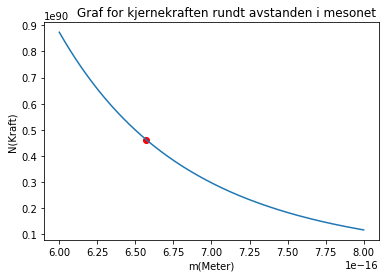

In [46]:
fEm = eL*((1/4*np.pi*eps0) * (1*eL/1e-15**2))#N, Et protons elektriske felt
fSterk = 137*fEm#N, 137 ganger protonets elektriske felt

def kjerneKraft(r): #utrykk for den sterke kjernekraften
    return fSterk/r**7

print("Kraften som trekker kvarkene sammen i mesonet blir")
print(str(kjerneKraft(rPi))+" N")

x=np.linspace(0.6e-15,0.8e-15,1001)
plt.title("        Graf for kjernekraften rundt avstanden i mesonet")
plt.xlabel("m(Meter)")
plt.ylabel("N(Kraft)")
plt.plot(rPi,kjerneKraft(rPi),'ro')
plt.plot(x,kjerneKraft(x))

## Mesonet
Så må vi bygge mesonet

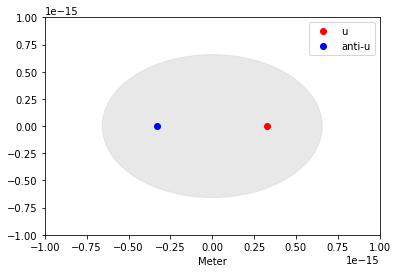

In [52]:
u = [rPi/2,0]
au = [-rPi/2,0]

def meson():
    plt.plot(u[0],u[1],'ro',label='u')
    plt.plot(au[0],au[1],'bo',label='anti-u')
    plt.xlabel("Meter")

    mesonSurface = plt.Circle((0, 0), rPi, color='lightgray', alpha=0.5)
    ax = plt.gca()
    ax.add_artist(mesonSurface)

    plt.xlim(-10e-16,10e-16)
    plt.ylim(-10e-16,10e-16)
    plt.legend()
meson()

og mesonets elektrisk felt

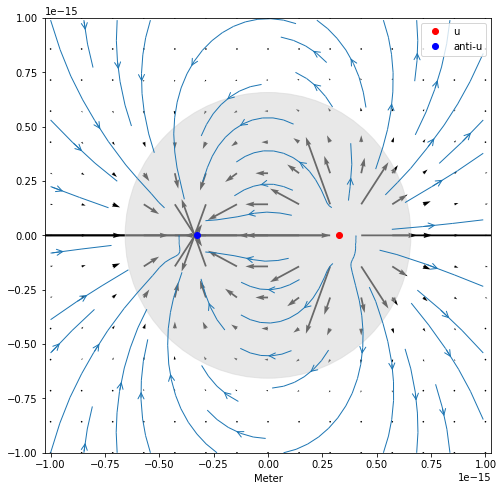

Den totale tiltrekkende kraften i mesonet
 2.643063046003298e-08N
+4.628211095098426e+89N
 =
 4.628211095098426e+89N


In [53]:
def efield(r,q,ri):
    R = r - ri
    Rnorm = np.linalg.norm(R)
    return q*R/Rnorm**3

r = np.array([1,0])
r1 = np.array([rPi/2,0])
r2 = np.array([-rPi/2,0])

#definere space
x = np.linspace(-10e-16,10e-16,15)
y = np.linspace(-10e-16,10e-16,15)
X,Y = np.meshgrid(x,y)
Ex = X.copy()
Ex[:]=0
Ey = Y.copy()
Ey[:]=0
for i in range(len(X.flat)):
    r = np.array([X.flat[i],Y.flat[i]])
    Ex.flat[i],Ey.flat[i] = efield(r,uQ,r1)+efield(r,auQ,r2)

plt.figure(figsize=(8,8))
plt.quiver(X,Y,Ex,Ey)
plt.streamplot(x,y, Ex, Ey,linewidth=1,density=0.5,arrowstyle='->',arrowsize=1.5)
plt.axis('equal')

meson()

plt.show()

print("Den totale tiltrekkende kraften i mesonet")
print(" " + str(efield(r1,uQ,r2)[0]*uQ) + "N")
print("+" + str(kjerneKraft(rPi)) + "N")
print(" =")
print(" " + str(efield(r1,uQ,r2)[0]*uQ +kjerneKraft(rPi)) + "N")

In [49]:
print("For å splitte kvarkene må vi ha et elektrisk felt støre enn ")
minFeltStyrke = efield(r1,uQ,r2)[0] + (kjerneKraft(rPi) / uQ)
print(str(minFeltStyrke) + " V/m")

For å splitte kvarkene må vi ha et elektrisk felt støre enn 
4.3330532701492293e+108 V/m


Ilustrasjon:

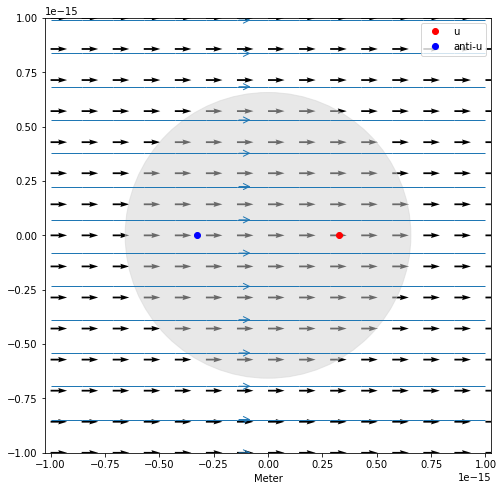

In [54]:
for i in range(len(X.flat)):
    r = np.array([X.flat[i],Y.flat[i]])
    Ex.flat[i],Ey.flat[i] = efield(r,uQ,r1)+efield(r,auQ,r2)+[minFeltStyrke,0]
plt.figure(figsize=(8,8))
plt.quiver(X,Y,Ex,Ey)
plt.streamplot(x,y, Ex, Ey,linewidth=1,density=0.5,arrowstyle='->',arrowsize=1.5)
plt.axis('equal')

meson()
plt.show()


# Konklusjon

Modelen for den sterke kjernekraft er ikke presis, men kraften er fortsatt for stor i forhold til den elektriske kraften, så et elektrisk felt vil ikke være brukbart for å konverte energi til materie.


## Kilder:
Sterk kjernekraft: https://en.wikipedia.org/wiki/Strong_interaction#Behavior_of_the_strong_force